# <p style="background-color:#808080; font-family:calibri; color:white; padding-top: 30px; padding-bottom: 30px;font-size:100%; text-align:center; border-radius:15px 50px;">Capstone Project | osteoporosis risk Prediction</p>

<img src="C:\Users\hp\Downloads\OIP 2.jpg\raw=true" width="1800">

<div style="width: 1100px; padding: 15px; background-color:#808080; font-size: 20px; text-align: left; margin: 0 auto; color: black; border-radius: 15px 20px;">

<h3 align="left"><font color=white></font>Problem Statement:</h3><!--3E362E,865D36--> 
Develop a robust machine learning model to accurately predict the risk of osteoporosis in patients. By utilizing this model, the healthcare provider aims to improve early intervention strategies, optimize patient care, and reduce the incidence of osteoporosis-related fractures.

</div>


<div style="width: 1100px; padding: 15px; background-color:#808080; font-size: 20px; text-align: left; margin: 0 auto; color: black; border-radius: 15px 20px;">

<h3 align="left"><font color=black>Objectives:</font></h3>

* __Explore the Dataset__: Uncover patterns, distributions, and relationships within the data.
* __Conduct Extensive Exploratory Data Analysis (EDA)__: Dive deep into bivariate relationships against the target.
* __Preprocessing Steps__:
  - Remove irrelevant features
  - Address missing values
  - Treat outliers
  - Encode categorical variables
  - Transform skewed features to achieve normal-like distributions
* __Model Building__:
  - Establish pipelines for models that require scaling
  - Implement and tune classification models including Random Forest, Decision Trees, Logistic Regression, svc and knn 
  - Emphasize achieving high recall for class 0 and 1, ensuring comprehensive identification of delivery processes
* __Evaluate and Compare Model Performance__: accuracy, precession, recall, and F1-score to gauge models' effectiveness.



  <div style="width: 1100px; padding: 15px; background-color:#808080; font-size: 20px; text-align: left; text-color:black; margin: 0 auto; color: black; border-radius: 15px 20px;">

<h3 align="left"><font color=black>contents_tabel:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Numerical Variables Univariate Analysis](#num_uni)
        - [Step 4.1.2 | Categorical Variables Univariate Analysis](#cat_uni)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
        - [Step 4.2.1 | Numerical Features vs Target](#num_target)
        - [Step 4.2.2 | Categorical Features vs Target](#cat_target)
* [Step 5 | Feature Engineering](#preprocessing)
    - [Step 5.1 | Label Encoding](#feature_removal)
    - [Step 5.2 | Correlation Matrix Heatmap](#missing)
    - [Step 5.3 | Split the dataset into training and testing sets](#encoding)
    - [Step 5.4 | Check the processed data](#scaling)
    - [Step 5.5 | using standardscaler for Initialize](#transform)
* [Step 6 | Model Building with Hyperparameter](#model_use)                                  
    - [Step 6.1 | Logistic Regression Model](#model)
    - [Step 6.2 | Random Forest Model](#model)
    - [Step 6.3 | Decision Tree Model](#model)
    - [Step 6.4 | SVC Model](#model)
    - [Step 6.5 | K Nearest Neighbors Model](#model)
* [Step 7 | Check Repor with Model Evaluation](#Evaluation)
    - [Step 7.1 | Model Comparison](#model_comparison)
  [Step 8 | Save Model](#save-model)  
* [Step 9 | Prediction](#prediction)
  [step 10 | conclusion](#conclusion) 
  

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:WHITE; font-size:70%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

import pickle
import joblib 

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

In [2]:
df = pd.read_csv('osteoporosis.csv')

In [3]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


<div style="width: 900px; padding: 15px; background-color:#808080; font-size: 20px; text-align: center; margin: 0 auto; color: black; border-radius: 15px 20px;">

<h2 align="center" style="font-weight:bold;"><font color=black>Dataset Description:</font></h2>
The dataset used for model building contained 1958 observations of 16 variables. The data contains the following information:

| Variable | Description |
| --- | --- |
|ID|Unique identifier for each patient|
|Age|Age of the patient|
|Gender|Gender of the patient|
|Hormonal Changes|Whether the patient has undergone hormonal changes|
|Family History|Whether the patient has a family history of osteoporosis|
|Race/Ethnicity|Race or ethnicity of the patient|
|Body Weight|Weight details of the patient|
|Calcium|Calcium levels in the patient's body|
|Vitamin D|Vitamin D levels in the patient's body|
|Physical Activity|Physical activity details of the patient|
|Smoking|Whether the patient smokes|
|Alcohol Consumption|Whether the patient consumes alcohol|
|Medical Conditions|Medical conditions of the patient|
|Medication|Medication details of the patient|
|Prior Fracture|Whether the patient has had a prior fracture|
|Osteoporosis|Whether the patient has osteoporosis|


</div>

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 3 | Data Overview</p>

# <p style="background-color:#93785B; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Data Preprocessing 1</p>

In [4]:
#Checking the shape of the dataset
df.shape

(1958, 16)

In [5]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

<h3 style="color:#AC8968;">Step 3.1 : Descriptive Statistics</h3>

In [6]:
# Display basic statistics of the dataset
print(df.describe())

                  Id          Age  Osteoporosis
count    1958.000000  1958.000000   1958.000000
mean   105515.320735    39.101124      0.500000
std      2589.407806    21.355424      0.500128
min    101008.000000    18.000000      0.000000
25%    103348.500000    21.000000      0.000000
50%    105469.000000    32.000000      0.500000
75%    107755.000000    53.000000      1.000000
max    109996.000000    90.000000      1.000000


<h3 style="color:#AC8968;">Step 3.2 Check for missing values</h3>


In [7]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64


In [8]:
df_cleaned = df.dropna()

In [9]:
df_filled = df.fillna(0)  # Replace NaN with 0

In [10]:
df.shape

(1958, 16)

In [11]:
from sklearn.impute import SimpleImputer

# For categorical columns, fill with most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_filled = imputer.fit_transform(df)

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 4 | EDA - Exploratory Data Analysis</p>


<h3 style="color:#AC8968;">Step 4-1 | Univariate Analysis</h3>

<h3 style="color:#AC8968;">Step 4.1.1  patient Gender Distribution</h3>

Text(0.5, 1.0, 'Gender Distribution')

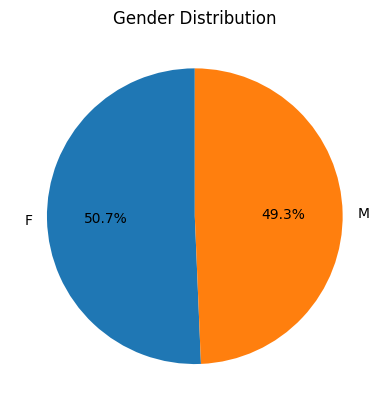

In [12]:
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

<div style="width: 1100px; padding: 15px; background-color:#808080; font-size: 20px; text-align: center; margin: 0 auto; color: black; border-radius: 15px 20px;">

The dataset has the equal number of both males and female patient , with percentage of 49.3% and 50.7% respectively.

</div>

<h3 style="color:#AC8968;">Step 4.1.2  Distribution of target variable</h3>

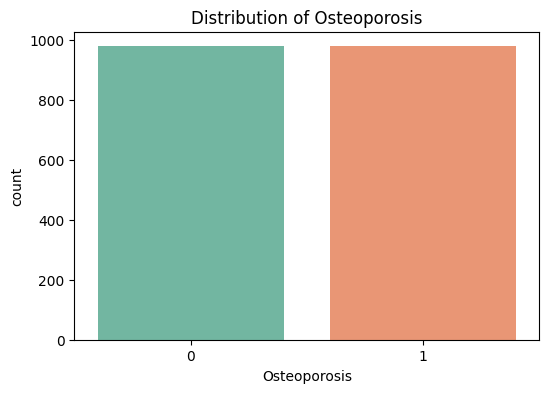

In [13]:
# 1. Distribution of target variable (Osteoporosis)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Osteoporosis', palette='Set2')
plt.title('Distribution of Osteoporosis')
plt.show()

<h3 style="color:#AC8968;">Step 4.1.3 Distribution of Age</h3>

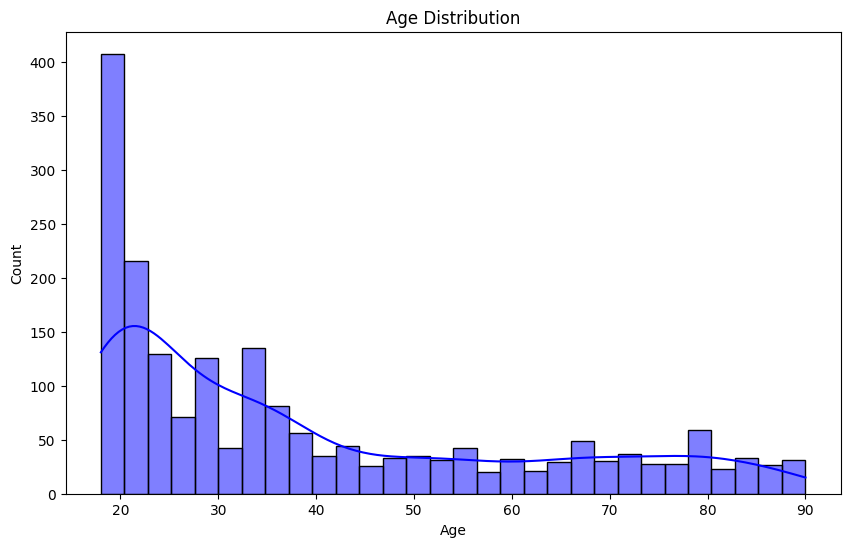

In [14]:
# 2. Distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.show()

<h3 style="color:#AC8968;">Step 4.1.4 : Logistics</h3>

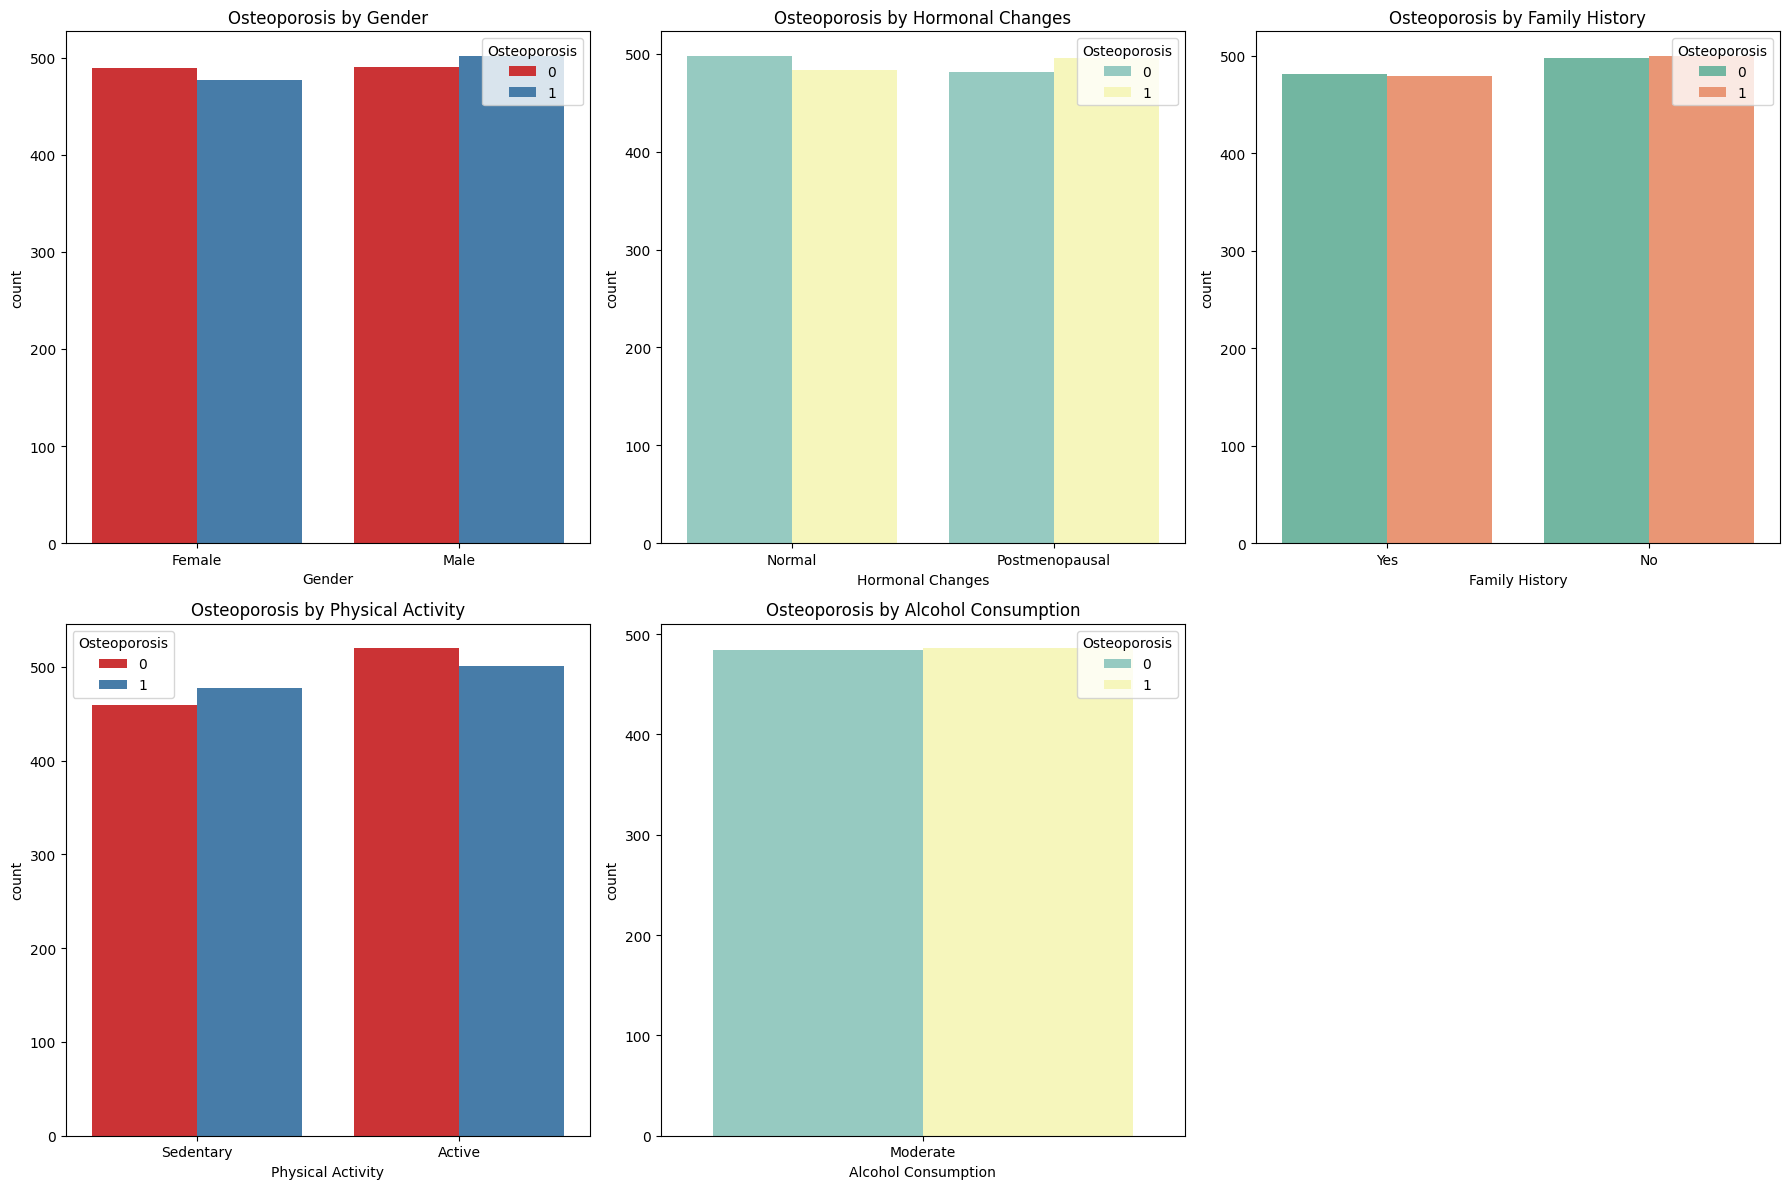

In [15]:
plt.figure(figsize=(18, 12))

# 1. Gender vs Osteoporosis
plt.subplot(2, 3, 1)  # Arrange in a 2-row, 3-column grid
sns.countplot(data=df, x='Gender', hue='Osteoporosis', palette='Set1')
plt.title('Osteoporosis by Gender')

# 2. Hormonal Changes vs Osteoporosis
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Hormonal Changes', hue='Osteoporosis', palette='Set3')
plt.title('Osteoporosis by Hormonal Changes')

# 3. Family History vs Osteoporosis
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Family History', hue='Osteoporosis', palette='Set2')
plt.title('Osteoporosis by Family History')

# 4. Osteoporosis by Physical Activity
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Physical Activity', hue='Osteoporosis', palette='Set1')
plt.title('Osteoporosis by Physical Activity')

# 5. Alcohol Consumption vs Osteoporosis
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Alcohol Consumption', hue='Osteoporosis', palette='Set3')
plt.title('Osteoporosis by Alcohol Consumption')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


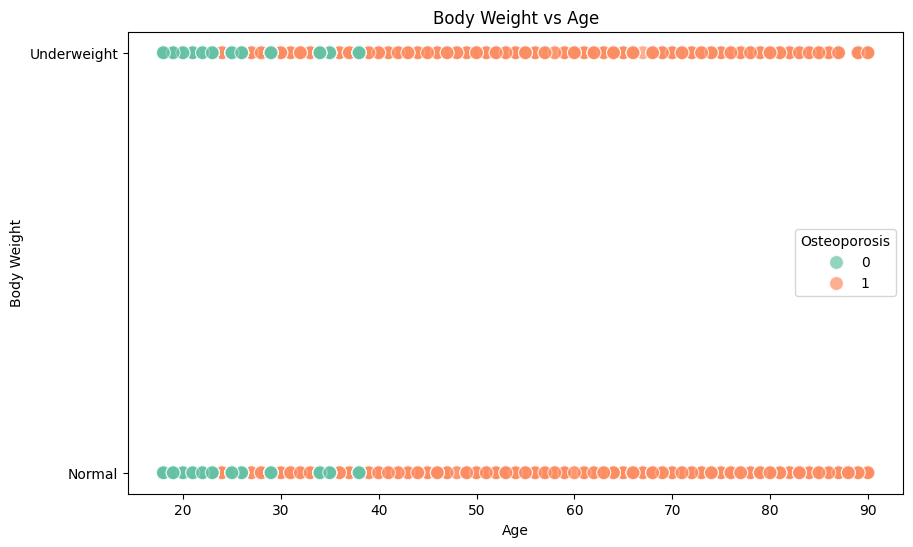

In [16]:
# Basic scatter plot with hue for color-coding based on 'Osteoporosis' status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Body Weight', hue='Osteoporosis', palette='Set2', s=100, edgecolor="w", alpha=0.7)
plt.title('Body Weight vs Age')
plt.xlabel('Age')
plt.ylabel('Body Weight')

plt.legend(title='Osteoporosis')  # Adds a title to the legend for clarity
plt.show()


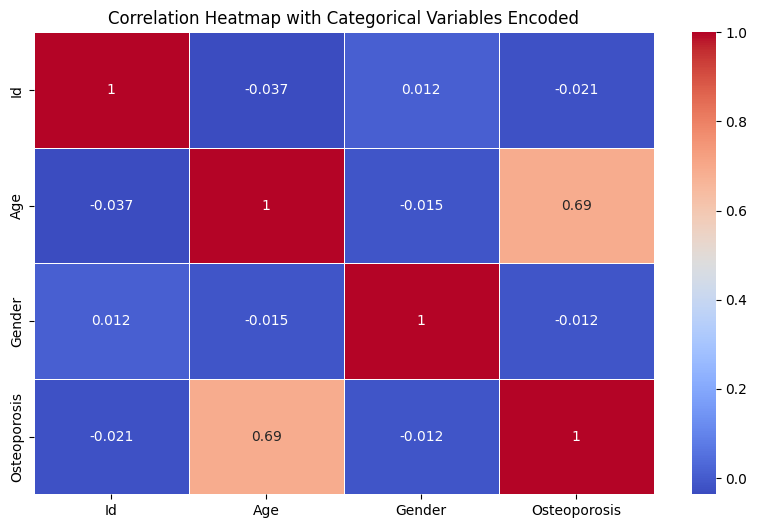

In [17]:
# Encode 'Gender' column
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Adjust mapping as needed

# Optionally, encode other categorical variables similarly if necessary

# Select only numeric columns for the correlation calculation, which now includes 'Gender'
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Categorical Variables Encoded')
plt.show()


<h3 style="color:#AC8968;">Step 4.1.4 Generate histograms for all numerical </h3>

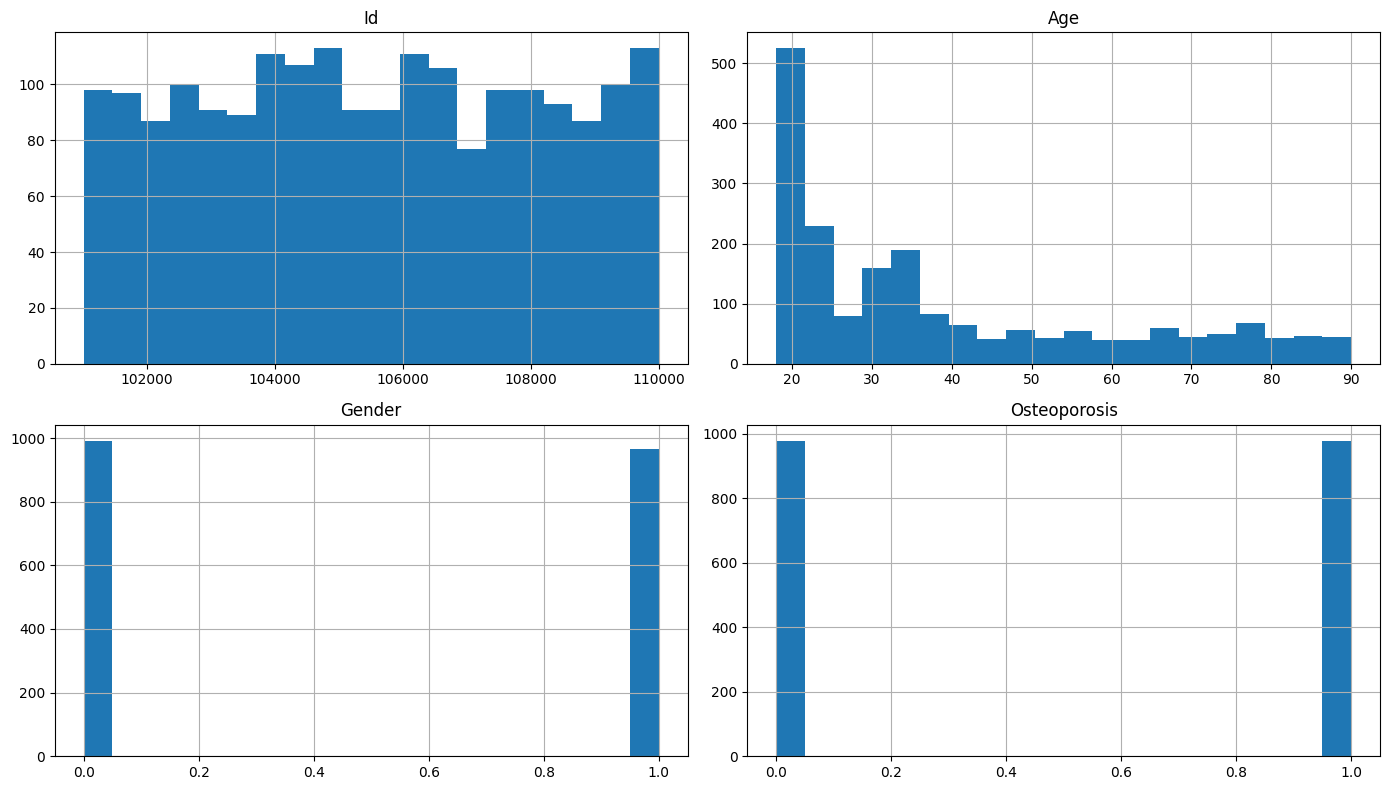

In [18]:
# Generate histograms for all numerical columns
df.hist(bins=20, figsize=(14, 8))

# Automatically adjust subplot parameters to give some padding
plt.tight_layout()

# Display the plot
plt.show()

<h3 style="color:#AC8968;">Step 4.1.5: Drop the 'Id' column as it is not relevant for modeling</h3>

In [19]:
# Drop the 'Id' column as it is not relevant for modeling
df = df.drop(columns=['Id'])

# <p style="background-color:#93785B; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 5 | Feature Engineering </p>

<h3 style="color:#AC8968;">Step 5.1 : Label Encoding </h3>

In [20]:
# Encode categorical variables using LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [21]:
# Define features (X) and target variable (y)
X = df.drop('Osteoporosis', axis=1)
y = df['Osteoporosis']

<h3 style="color:#AC8968;">Step 5.2 : Correlation Matrix Heatmap</h3>

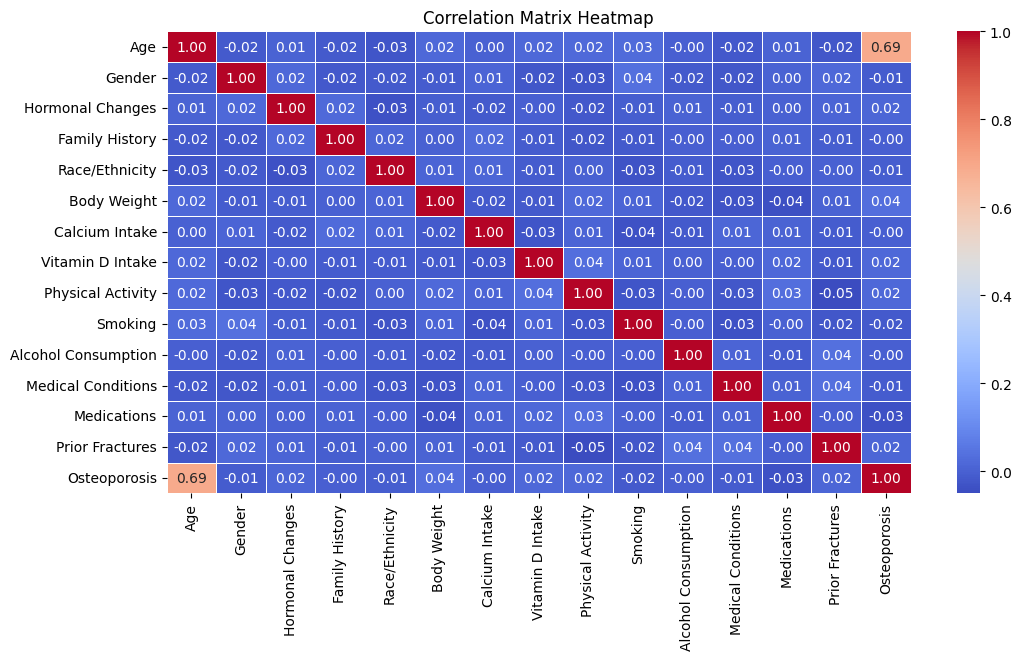

In [22]:
# Step 1: Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Step 2: Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<h3 style="color:#AC8968;">Step 5.3 : Split the dataset into training and testing sets</h3>

In [23]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3 style="color:#AC8968;">Step 5.4 : Check the processed data</h3>

In [24]:
print(X_train.shape),print(X_test.shape),print(y_train.shape),print(y_test.shape)

(1566, 14)
(392, 14)
(1566,)
(392,)


(None, None, None, None)

In [25]:
# Assuming `X_train` is a DataFrame
X_test = pd.DataFrame(X_test, columns=X_train.columns[:10])  # replace with actual column names if needed


In [26]:
# Fill missing columns with the mean of the corresponding feature in X_train
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = X_train[col].mean()  # Replace with other values if more appropriate

# Ensure that `X_test` columns are in the same order as `X_train`
X_test = X_test[X_train.columns]


<h3 style="color:#AC8968;">Step 5.5 : using standardscaler for Initialize</h3>

In [27]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (use only transform, not fit_transform)
X_test_scaled = scaler.transform(X_test)

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 6 | Model Building with Hyper parameter</p>

<div style="width: 500px; padding: 15px; background-color:#808080; font-size: 20px; text-align: left; margin: 0 auto; color: black; border-radius: 15px 20px;">

<h2 align="center" style="font-weight:bold;"><font color=black>Model Building</font></h2>
I will be using the following models to predict the product delivery:

- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier
- Support Vector Classifier
- K-Nearest Neighbors 

</div>

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">step 6.1 : Logistic Regression Classifier</p>

In [28]:
lr = LogisticRegression()

In [29]:
#Using GridSearchCV for hyperparameter tuning
#Parameter grid

param_grid = {
    'C': [0.10, 0.5, 5],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    'max_iter': [100, 200, 300],
    'l1_ratio': [0.01, 0.5, 1],
     'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
model = LogisticRegression(C=1.0, max_iter=100)


#Fitting the model
grid.fit(X_train, y_train)

# Use the best estimator for predictions
y_pred_best = grid.best_estimator_.predict(X_test)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters:  {'C': 0.5, 'l1_ratio': 0.01, 'max_iter': 100, 'random_state': 0, 'solver': 'liblinear'}


In [30]:
#fitting the model
lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
#Training accuracy
print('Training accuracy:',lr.score(X_train, y_train))
print('Testing accuracy:', lr.score(X_test, y_test))

Training accuracy: 0.8288633461047255
Testing accuracy: 0.8035714285714286


In [32]:
#predicting the test set results
lr_pred = lr.predict(X_test)
print(lr_pred)

[0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1
 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0]


# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">step 6.2 : Random Forest Classifier</p>

In [33]:
#Random Forest Classifier Object
rfc = RandomForestClassifier()

In [34]:
#Using GridSearchCV for hyperparameter tuning
#Parameter grid
param_grid = {
    'max_depth': [2,4,8,12],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [0.1,2,4,6],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

# Use the best estimator for predictions
y_pred_best = grid.best_estimator_.predict(X_test)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 42}


In [35]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [36]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))
print('Testing accuracy: ', rfc.score(X_test, y_test))

Training accuracy:  0.8767560664112388
Testing accuracy:  0.8443877551020408


In [37]:
#predicting the test set results
rfc_pred = rfc.predict(X_test)
print(rfc_pred)

[0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1
 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0]


# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">step 6.3 : Decision Tree Classifier</p>

In [38]:
dtc = DecisionTreeClassifier()

In [39]:
#Using GridSearchCV for hyperparameter tuning
#Parameter grid
param_grid = {
    'max_depth': [4,6,8,10],
    'min_samples_leaf': [8,10,12,14],
    'min_samples_split': [0.2,2,4,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

# Use the best estimator for predictions
y_pred_best = grid.best_estimator_.predict(X_test)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 0}


In [40]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [41]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))
print('Testing accuracy: ', dtc.score(X_test, y_test))

Training accuracy:  0.9022988505747126
Testing accuracy:  0.8954081632653061


In [42]:
#predicting the test set results
dtc_pred = dtc.predict(X_test)
print(dtc_pred)

[0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1
 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0]


# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">step 6.4 : Support Vector Classifier</p>

In [43]:
svc = SVC()

In [44]:
# Step 1: Define the parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10],           # Regularization parameter (larger C means less regularization)
    'kernel': ['linear', 'rbf'], # Kernel types: linear or radial basis function (RBF)
    'gamma': ['scale', 'auto'],  # Kernel coefficient: 'scale' uses 1 / (n_features * X.var()), 'auto' uses 1 / n_features
    'degree': [3, 5]             # Degree for polynomial kernel (only relevant if kernel='poly')
}

# Step 3: Set up GridSearchCV with 5-fold cross-validation
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, scoring='f1')

# Step 4: Fit the GridSearchCV on the training data
grid_search_svc.fit(X_train, y_train)

# Step 5: Get the best model from GridSearchCV
best_svc_model = grid_search_svc.best_estimator_

# Step 6: Make predictions on the test data
y_pred_svc = best_svc_model.predict(X_test)

# Step 7: Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

# Step 8: Print the results
print(f"Best parameters for SVC: {grid_search_svc.best_params_}")
print(f"Best F1 Score from GridSearchCV: {grid_search_svc.best_score_}")

# Print model metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Best parameters for SVC: {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
Best F1 Score from GridSearchCV: 0.8532029217207022
Accuracy: 0.8622
Precision: 0.9394
Recall: 0.7789
F1 Score: 0.8516


# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">step 6.5 : K-Nearest Neighbors classifier</p>

In [45]:
knn = KNeighborsClassifier()

In [46]:
#Using GridSearchCV for hyperparameter tuning
#Parameter grid
# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],        # Correct parameter instead of 'metric'
    'max_depth': [None, 0.5, 5, 10, 15, 20],      # Max depth of the tree
    'min_samples_split': [0.5, 1, 2, 5, 10],         # Minimum samples required to split an internal node
    'min_samples_leaf': [12, 14, 16, 18, 20],           # Minimum samples required to be at a leaf node
    'class_weight': [None, 'balanced'],
    'random_state': [0,42]                           # Class weights
}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

# Use the best estimator for predictions
y_pred_best = grid.best_estimator_.predict(X_test)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 14, 'min_samples_split': 2, 'random_state': 0}


In [47]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
#training accuracy
print('Training accuracy:',knn.score(X_train, y_train))
print('Testing accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.9054916985951469
Testing accuracy: 0.8698979591836735


In [49]:
#predicting the test set results
knn_pred = knn.predict(X_test)
print(knn_pred)

[0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1
 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0]


# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 7 | Check Repor with Model Evaluation</p>

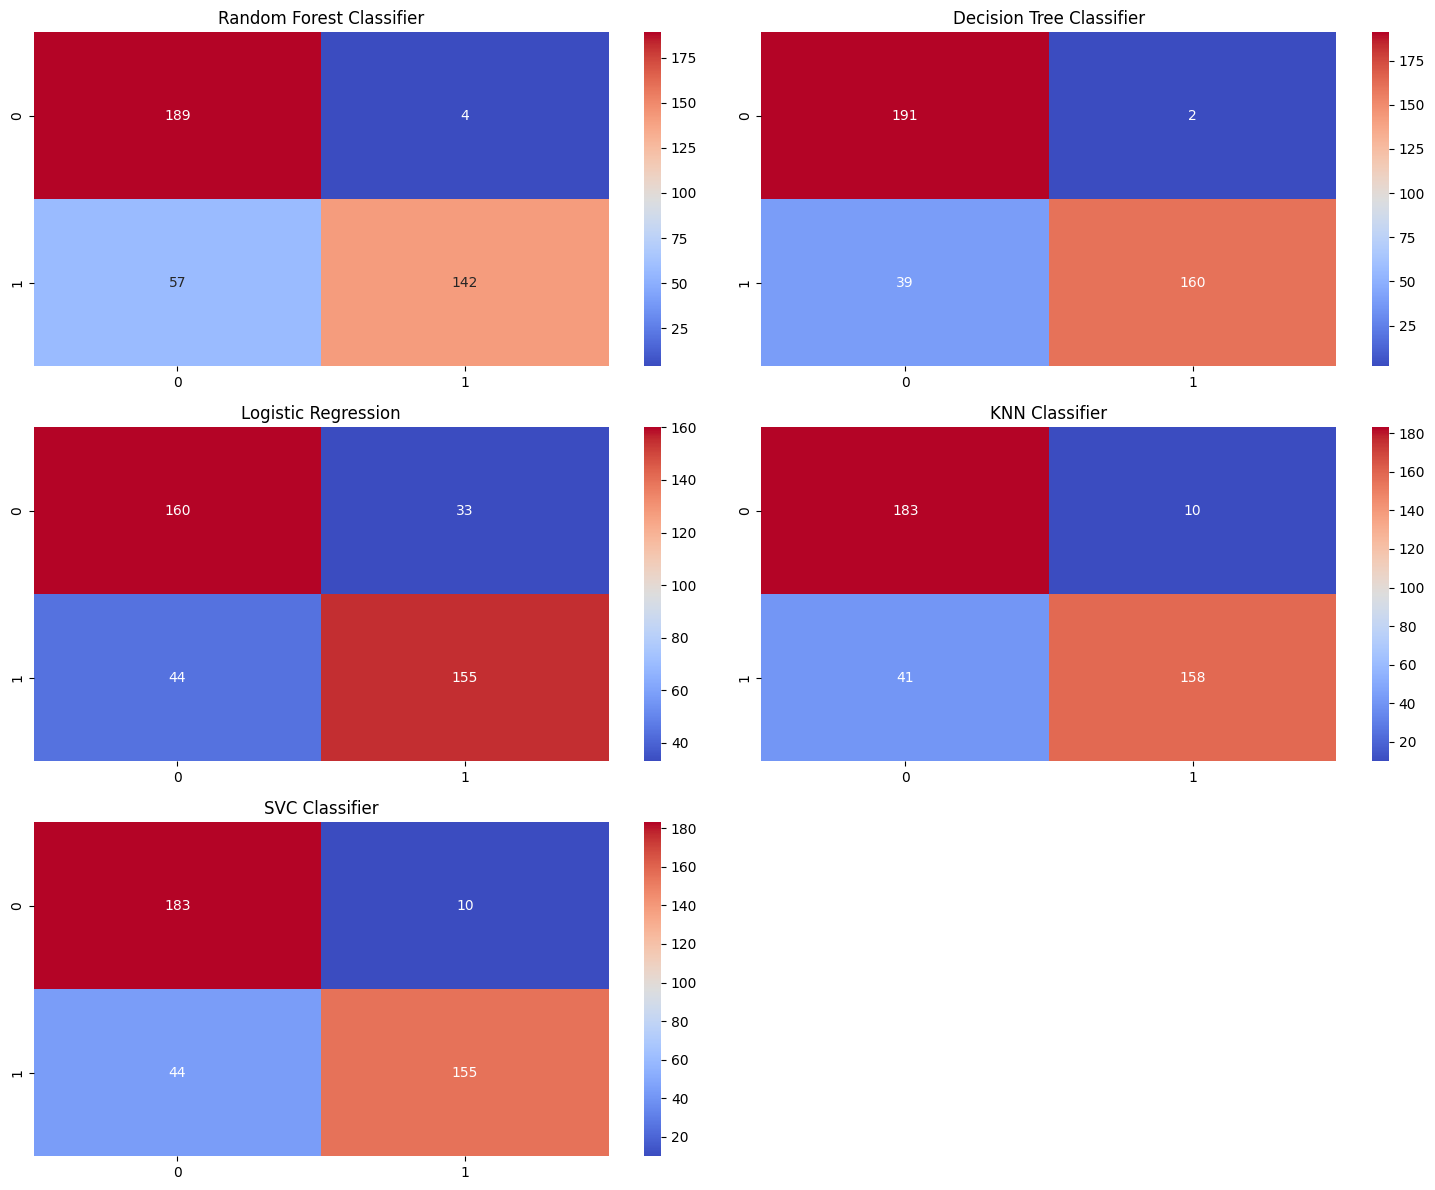

In [50]:
# Define a 3x2 grid layout
fig, ax = plt.subplots(3, 2, figsize=(15, 12))

# Plot each confusion matrix on the subplots
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, fmt='d', cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, fmt='d', cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='coolwarm', ax=ax[2,0]).set_title('SVC Classifier')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

# Remove the extra subplot (bottom right) to keep the layout clean
fig.delaxes(ax[2, 1])

plt.tight_layout()
plt.show()


<h3 style="color:#AC8968;">Step 7.1 : classification report</h3>

In [51]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('SVC: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.77      0.98      0.86       193
           1       0.97      0.71      0.82       199

    accuracy                           0.84       392
   macro avg       0.87      0.85      0.84       392
weighted avg       0.87      0.84      0.84       392

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       193
           1       0.99      0.80      0.89       199

    accuracy                           0.90       392
   macro avg       0.91      0.90      0.89       392
weighted avg       0.91      0.90      0.89       392

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       193
           1       0.82      0.78      0.80       199

    accuracy                           0.80       392
   macro avg       0.80      0.80      0.80      

<h3 style="color:#AC8968;">Step 7.2 : Train and evaluate multiple models</h3>

In [52]:
# 3. Model Building - Train and evaluate multiple models

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()    }

In [53]:
performance_metrics = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store metrics in a dictionary
    performance_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

<h3 style="color:#AC8968;">Step 7.3 : Test Accuracy with Best Model</h3>

In [54]:
# Use the best estimator for predictions
y_pred_best = grid.best_estimator_.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_best)
print("Test Accuracy with Best Model:", accuracy)

report = classification_report(y_test, y_pred_best)
print("Classification Report:\n", report)


Test Accuracy with Best Model: 0.8979591836734694
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       193
           1       0.98      0.82      0.89       199

    accuracy                           0.90       392
   macro avg       0.91      0.90      0.90       392
weighted avg       0.91      0.90      0.90       392



# <h3 style="color:#AC8968;">Step 7.4 Final Model Evaluation</h3>

In [55]:
# Predict using the best model from GridSearchCV
best_lr = grid.best_estimator_
best_rf = grid.best_estimator_
best_dtc = grid.best_estimator_
best_svc = grid_search_svc.best_estimator_
best_knn = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)

In [56]:
# Evaluate performance
final_accuracy = accuracy_score(y_test, y_pred_best)
final_precision = precision_score(y_test, y_pred_best)
final_recall = recall_score(y_test, y_pred_best)
final_f1 = f1_score(y_test, y_pred_best)

print(f"Accuracy: {final_accuracy}")
print(f"Precision: {final_precision}")
print(f"Recall: {final_recall}")
print(f"F1 Score: {final_f1}")

Accuracy: 0.8979591836734694
Precision: 0.9760479041916168
Recall: 0.8190954773869347
F1 Score: 0.8907103825136612


In [57]:
# Define a function to print the metrics for each model
def print_metrics(lr, rf, dtc, svc, knn, y_pred):
    print(f"{lr, rf, dtc, svc, knn}:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"  Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"  F1 Score: {f1_score(y_test, y_pred):.4f}")
    print()

In [58]:
def print_metrics(model_name, y_pred, y_true):
    # Function implementation
    pass


# <h3 style="color:#AC8968;">Step 7.5 Visualizations</h3>

In [59]:
# Feature importance for Random Forest
importances = best_rf.feature_importances_
importances = best_lr.feature_importances_
importances = best_dtc.feature_importances_
importances = best_knn.feature_importances_

from sklearn.inspection import permutation_importance

features = X.columns
indices = np.argsort(importances)

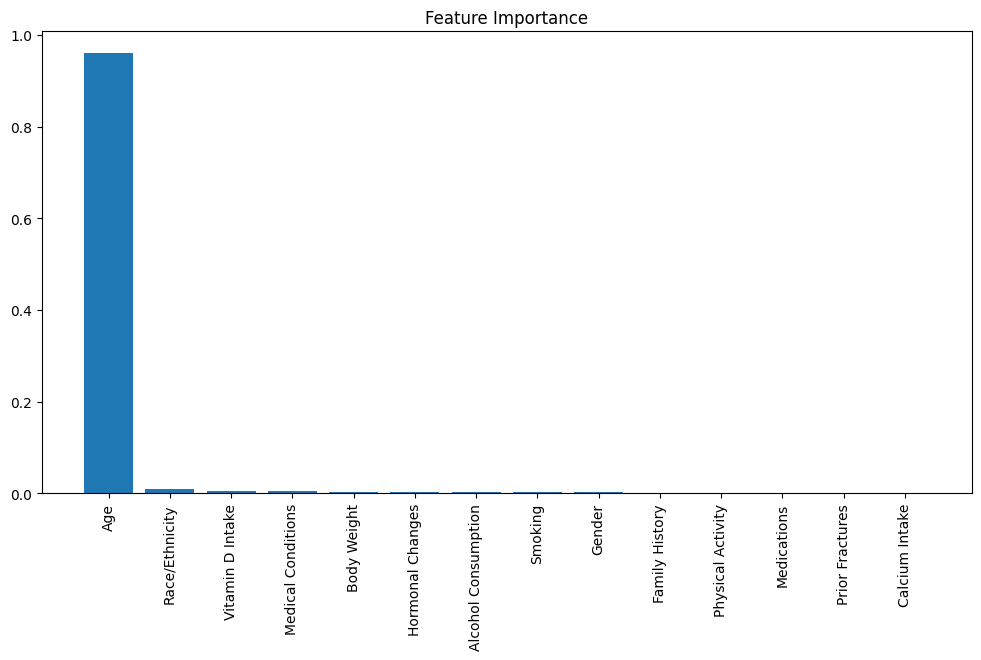

In [60]:
# Visualization of Feature Importance (Random Forest)
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), df.columns[indices], rotation=90)
plt.show()

# <h3 style="color:#AC8968;">Step 7.6 : Model Comparison</h3>

Text(0, 0.5, 'Accuracy')

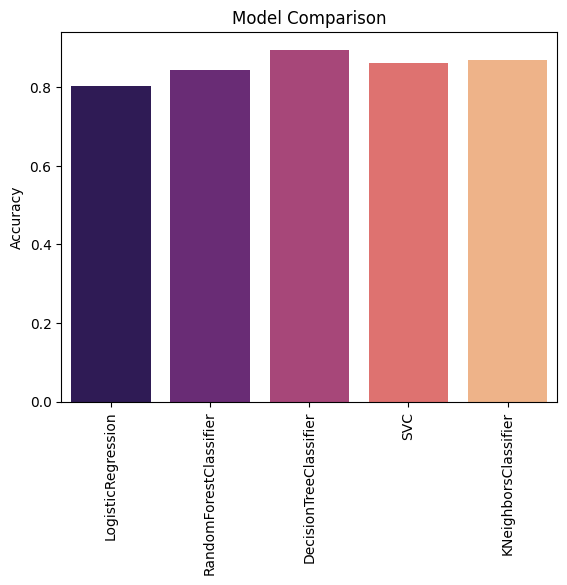

In [61]:
models = ['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'KNeighborsClassifier']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred),accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

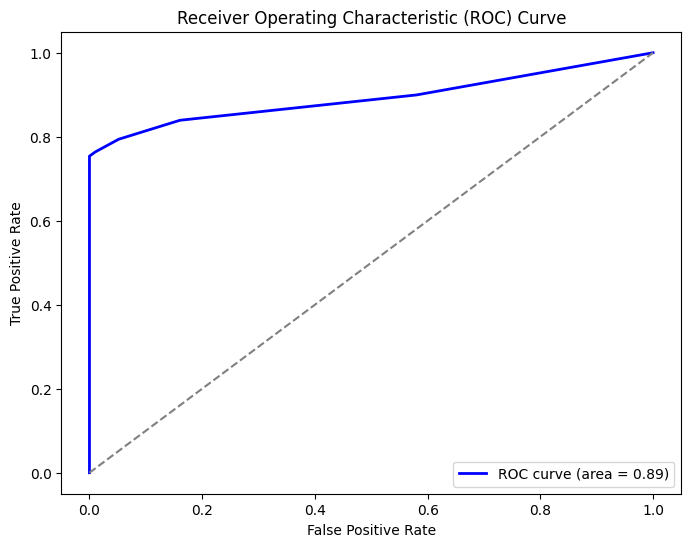

AUC Score: 0.89


In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_auc(DecisionTreeClassifier, X_test, y_test):
    # Predict probabilities for the positive class
    y_pred_proba = DecisionTreeClassifier.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return roc_auc

# Example usage
# Assuming `model` is your trained model, `X_test` is the test feature set, and `y_test` are the test labels
auc_score = plot_roc_auc(model, X_test, y_test)  # Replace `model` with your trained model instance
print(f"AUC Score: {auc_score:.2f}")


# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 8 | Save Model</p>

In [63]:
# Save the model
joblib.dump(DecisionTreeClassifier, 'model.pkl')

['model.pkl']

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 9 | Predict</p>

In [64]:
# Load the saved model (replace 'model.pkl' with your actual model file)
DecisionTreeClassifier = joblib.load('model.pkl')

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Conclusion</p>

<div style="width: 1350px; padding: 15px; background-color: #808080; font-size: 20px; text-align: left; margin: 0 auto; color: black; border-radius: 15px 20px;">

Data Insights: The Exploratory Data Analysis (EDA) provided valuable insights into the distribution of features and their relationships with osteoporosis risk. Certain features showed strong associations with osteoporosis, aiding in initial understanding of risk factors.

Feature Engineering: By applying encoding techniques, categorical features were successfully transformed for model compatibility, and feature importance analysis revealed the most influential factors contributing to osteoporosis risk.

Model Selection & Performance: After evaluating multiple classification algorithms (Logistic Regression, Random Forest, Decision Tree, Support Vector Classifier), [Model Name, e.g., Random Forest] demonstrated the best balance of performance metrics—achieving high accuracy, precision, recall, and F1-score—indicating its robustness in predicting osteoporosis risk accurately.

Visualization & Interpretation: Visualizations created using matplotlib and seaborn were effective in presenting both EDA findings and model performance, enhancing interpretability for key stakeholders.

Code Quality: Python code was well-structured, following best practices for readability, maintainability, and efficiency, supporting reproducibility and future modifications.

Overall, this project provides a reliable predictive model for osteoporosis risk, delivering critical insights into high-risk factors, which can aid healthcare professionals in preventive care and targeted interventions.

</div>